In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir -p data/kitti/train/ data/kitti/val/ data/output/ data/models

In [3]:
!cp /content/drive/MyDrive/MDE-PyT-master/*.py .

In [4]:
TSRC_1="/content/drive/MyDrive/DataSet/KImages/data/kitti/train/2011_09_26_drive_0001_sync"
TSRC_2="/content/drive/MyDrive/DataSet/KImages/data/kitti/val/2011_09_26_drive_0020_sync"

TDEST="/content/data/kitti/train/2011_09_26_drive_0001_sync"
VDEST="/content/data/kitti/val/2011_09_26_drive_0020_sync"

!mkdir -p $TDEST/image_02/data/  $VDEST/image_02/data/
!mkdir -p $TDEST/image_03/data/  $VDEST/image_03/data/
!mkdir -p data/test/left/image_02/data  #Testing

!ls -l $TSRC_1/image_03/data/*.png | wc -l 
!ls -l $TSRC_2/image_02/data/*.png | wc -l
!echo "----------------------------------------------------------"
!echo "Training"
!cp $TSRC_1/image_02/data/*0[0-7][0-9].png $TDEST/image_02/data/
!cp $TSRC_1/image_03/data/*0[0-7][0-9].png $TDEST/image_03/data/
!cp $TSRC_2/image_02/data/*[0-5][0-9].png  $TDEST/image_02/data/
!cp $TSRC_2/image_03/data/*[0-5][0-9].png  $TDEST/image_03/data/
!ls -l $TDEST/image_02/data/*.png | wc -l
!ls -l $TDEST/image_03/data/*.png | wc -l

!echo "----------------------------------------------------------"
!echo "Validation"
!cp $TSRC_1/image_02/data/*08[0-9].png $VDEST/image_02/data/
!cp $TSRC_1/image_03/data/*08[0-9].png $VDEST/image_03/data/
!cp $TSRC_2/image_02/data/*06[0-9].png $VDEST/image_02/data/
!cp $TSRC_2/image_03/data/*06[0-9].png $VDEST/image_03/data/
!ls -l $VDEST/image_02/data/*.png | wc -l
!ls -l $VDEST/image_03/data/*.png | wc -l

!echo "----------------------------------------------------------"
!echo "Testing"
!cp $TSRC_1/image_02/data/*09[0-9].png data/test/left/image_02/data/
!cp $TSRC_2/image_02/data/*07[0-9].png data/test/left/image_02/data/
!ls -l data/test/left/image_02/data/*.png | wc -l
!echo "----------------------------------------------------------"

108
86
----------------------------------------------------------
Training
80
80
----------------------------------------------------------
Validation
20
20
----------------------------------------------------------
Testing
20
----------------------------------------------------------


In [5]:
import os
import torch
import numpy as np
import skimage.transform
import matplotlib.pyplot as plt
from easydict import EasyDict as edict

from main_monodepth_pytorch import Model
%reload_ext autoreload
%autoreload 2

## Train

Check if CUDA is available

In [6]:
torch.cuda.is_available()

True

In [7]:
torch.cuda.device_count()

1

In [8]:
torch.cuda.empty_cache()

In [9]:
!ls data/kitti/train/ data/kitti/val/

data/kitti/train/:
2011_09_26_drive_0001_sync

data/kitti/val/:
2011_09_26_drive_0020_sync


In [10]:
dict_parameters = edict({'data_dir':'data/kitti/train/',
                         'val_data_dir':'data/kitti/val/',
                         'model_path':'data/models/monodepth_resnet50_001.pth',
                         'output_directory':'data/output/',
                         'input_height':256,
                         'input_width':512,
                         'model':'resnet50_md',
                         'pretrained':True,
                         'mode':'train',
                         'epochs':20,                          #Jag --------200,
                         'learning_rate':1e-4,
                         'batch_size': 8,
                         'adjust_lr':True,
                         'device':'cuda:0',
                         'do_augmentation':True,
                         'augment_parameters':[0.8, 1.2, 0.5, 2.0, 0.8, 1.2],
                         'print_images':False,
                         'print_weights':False,
                         'input_channels': 3,
                         'num_workers': 4,             #Jag --------8,
                         'use_multiple_gpu': False})

In [11]:
model = Model(dict_parameters)

data/kitti/val/ : Use a dataset with 20 images
data/kitti/train/ : Use a dataset with 80 images


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [12]:
model.train()

Val_loss: 4.158667373657226
Epoch: 1 train_loss: 3.5650989770889283 val_loss: 3.2630635261535645 time: 7.127 s
Model_saved
Epoch: 2 train_loss: 3.296031951904297 val_loss: 3.154657554626465 time: 6.42 s
Model_saved
Epoch: 3 train_loss: 3.1339249134063722 val_loss: 3.481634521484375 time: 6.172 s
Epoch: 4 train_loss: 2.98330500125885 val_loss: 3.583722686767578 time: 6.165 s
Epoch: 5 train_loss: 2.9136064529418944 val_loss: 3.473946762084961 time: 6.373 s
Epoch: 6 train_loss: 2.886525821685791 val_loss: 3.6684675216674805 time: 6.289 s
Epoch: 7 train_loss: 2.8620333909988402 val_loss: 3.5946577072143553 time: 6.261 s
Epoch: 8 train_loss: 2.8034451961517335 val_loss: 3.5733850479125975 time: 6.469 s
Epoch: 9 train_loss: 2.796217107772827 val_loss: 3.610206890106201 time: 6.916 s
Epoch: 10 train_loss: 2.77252938747406 val_loss: 3.6262796401977537 time: 6.465 s
Epoch: 11 train_loss: 2.776548218727112 val_loss: 3.5665543556213377 time: 6.52 s
Epoch: 12 train_loss: 2.7622655630111694 val_los

In [13]:
!ls -l /content/data/models

total 686652
-rw-r--r-- 1 root root 234376446 Jan 27 10:54 monodepth_resnet50_001_cpt.pth
-rw-r--r-- 1 root root 234376935 Jan 27 10:56 monodepth_resnet50_001_last.pth
-rw-r--r-- 1 root root 234374490 Jan 27 10:56 monodepth_resnet50_001.pth


## Test the model

In [14]:
dict_parameters_test = edict({'data_dir':'data/test',
                              'model_path':'data/models/monodepth_resnet50_001_cpt.pth',
                              'output_directory':'data/output/',
                              'input_height':256,
                              'input_width':512,
                              'model':'resnet50_md',
                              'pretrained':False,
                              'mode':'test',
                              'device':'cuda:0',
                              'input_channels':3,
                              'num_workers':4,
                              'use_multiple_gpu':False})
model_test = Model(dict_parameters_test)

data/test : Use a dataset with 20 images


In [15]:
model_test.test()

Finished Testing


In [16]:
!ls -l /content/data/output/

total 20488
-rw-r--r-- 1 root root 10485888 Jan 27 10:56 disparities.npy
-rw-r--r-- 1 root root 10485888 Jan 27 10:56 disparities_pp.npy


In [17]:
disp = np.load('data/output/disparities_pp.npy')  # Or disparities.npy for output without post-processing
disp.shape

(20, 256, 512)

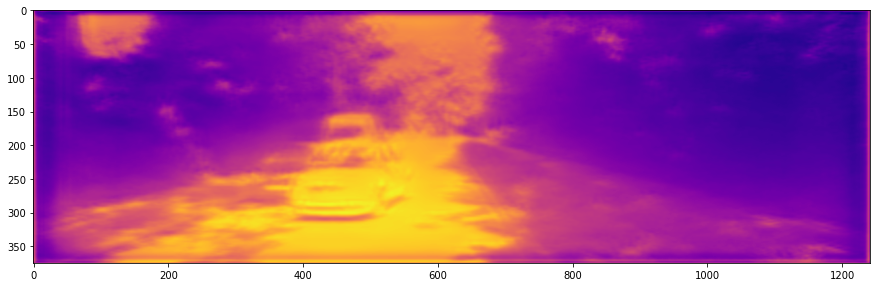

In [18]:
disp_to_img = skimage.transform.resize(disp[0].squeeze(), [375, 1242], mode='constant')
plt.imshow(disp_to_img, cmap='plasma')

Save a color image

In [19]:
plt.imsave(os.path.join(dict_parameters_test.output_directory,
                        dict_parameters_test.model_path.split('/')[-1][:-4]+'_test_output.png'), disp_to_img, cmap='plasma')

Save all test images

In [20]:
for i in range(disp.shape[0]):
    disp_to_img = skimage.transform.resize(disp[i].squeeze(), [375, 1242], mode='constant')
    plt.imsave(os.path.join(dict_parameters_test.output_directory,
               'pred_'+str(i)+'.png'), disp_to_img, cmap='plasma')

Save a grayscale image

In [21]:
plt.imsave(os.path.join(dict_parameters_test.output_directory,
                        dict_parameters_test.model_path.split('/')[-1][:-4]+'_gray.png'), disp_to_img, cmap='gray')

In [22]:
!zip 27Jan23_Resnet50_T80_VT20_E20_run.zip /content/data/output/*.* /content/data/test/left/image_02/data/*.* /content/data/models/*.*

  adding: content/data/output/disparities.npy (deflated 13%)
  adding: content/data/output/disparities_pp.npy (deflated 13%)
  adding: content/data/output/monodepth_resnet50_001_cpt_gray.png (deflated 1%)
  adding: content/data/output/monodepth_resnet50_001_cpt_test_output.png (deflated 0%)
  adding: content/data/output/pred_0.png (deflated 0%)
  adding: content/data/output/pred_10.png (deflated 0%)
  adding: content/data/output/pred_11.png (deflated 0%)
  adding: content/data/output/pred_12.png (deflated 0%)
  adding: content/data/output/pred_13.png (deflated 0%)
  adding: content/data/output/pred_14.png (deflated 0%)
  adding: content/data/output/pred_15.png (deflated 0%)
  adding: content/data/output/pred_16.png (deflated 0%)
  adding: content/data/output/pred_17.png (deflated 0%)
  adding: content/data/output/pred_18.png (deflated 0%)
  adding: content/data/output/pred_19.png (deflated 0%)
  adding: content/data/output/pred_1.png (deflated 0%)
  adding: content/data/output/pred_2.p

In [23]:
!du -kh *.zip

658M	27Jan23_T80_VT20_E20_run.zip


In [25]:
!cp 27Jan23_Resnet50_T80_VT20_E20_run.zip  /content/drive/MyDrive/ForMetrics